In [ ]:
from datasets import load_dataset
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as snsds = load_dataset("HC-85/open-food-facts", "nutrition-feats-only")

In [3]:
df = pd.DataFrame(ds["train"])
df.sample(5, random_state=42)

,product_name,generic_name,quantity,ingredients_text,serving_size,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,...,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,collagen-meat-protein-ratio_100g,glycemic-index_100g
244140,Lentilles,None,500,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2534,Mexican Style Blend Finely Shredded Cheese,None,None,"Montery jack cheese (pasteurized milk, cheese ...",28 g (0.25 cup),1494.0,NaN,28.57,17.86,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
212868,Pâte à Tarte Feuilletée Tout Simplement,Pâtes feuilletées,460 g (2x 460),"Farine de _blé_ française 47 %, margarine (hui...",None,1516.0,NaN,20.30,13.80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
284636,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
28049,Steak Sauce,None,None,"Tomato paste, vinegar, salt, water, sugar, mod...",17 g (1 Tbsp),247.0,NaN,0.00,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [ ]:
df.info()

Dropping `glycemic-index_100g` because it is full of NaN:

In [5]:
df_dropped = df.drop("glycemic-index_100g", axis=1).sample(1000, random_state=42)
df_dropped

,product_name,generic_name,quantity,ingredients_text,serving_size,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,...,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,collagen-meat-protein-ratio_100g
0,Farine de blé noir,None,1kg,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),None,None,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),2243.0,NaN,28.57,28.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Peanuts,None,None,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),1941.0,NaN,17.86,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Salted Nut Mix,None,None,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),2540.0,NaN,57.14,5.36,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Polenta,None,None,Organic polenta,35 g (0.25 cup),1552.0,NaN,1.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356022,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",None,None,"Organic peppermint, organic lemon grass, organ...",20 g (0.7 oz),0.0,NaN,0.00,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356023,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356024,Biscottes bio,None,300g,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356025,Tomates aux Vermicelles,None,67g,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,...,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,collagen-meat-protein-ratio_100g
count,295367.000000,869.000000,2.794970e+05,263823.000000,23040.000000,23075.000000,938.000000,207.000000,25.000000,143443.000000,...,6392.000000,3964.000000,2122.000000,1639.000000,99.000000,1181.000000,23.000000,20.000000,288.000000,182.000000
mean,1125.453320,587.216617,5.606587e+04,5.092460,10.501218,6.372548,3.476176,18.734295,41.243200,0.073487,...,0.531415,0.007921,0.025613,0.003165,0.010042,0.003098,0.001478,0.000230,0.000465,15.362637
std,936.825952,713.255708,2.963385e+07,7.965148,16.789189,10.930572,8.665162,32.590392,25.061032,1.539417,...,13.360342,0.080598,0.910794,0.028289,0.060819,0.103926,0.006248,0.000834,0.001604,3.692658
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.050000,1.000000,-3.570000,...,0.000000,0.000000,-6.896552,0.000000,0.000000,-0.000002,0.000007,0.000005,0.000000,8.000000
25%,382.000000,49.400000,1.000000e-01,0.000000,0.007500,0.000000,0.600000,2.600000,27.000000,0.000000,...,0.021000,0.001150,0.000177,0.000000,0.000029,0.000005,0.000012,0.000005,0.000015,12.000000
50%,1092.000000,300.000000,5.290000e+00,1.790000,4.000000,2.270000,1.835000,11.000000,31.000000,0.000000,...,0.075000,0.003630,0.000417,0.001000,0.000078,0.000022,0.000026,0.000013,0.000031,15.000000
75%,1674.000000,900.000000,2.000000e+01,7.140000,10.710000,7.350000,3.300000,24.150000,68.000000,0.000000,...,0.141000,0.007500,0.001000,0.002000,0.000485,0.000062,0.000073,0.000041,0.000103,15.000000
max,231199.000000,3830.000000,1.566667e+10,550.000000,100.000000,98.000000,206.000000,413.000000,75.000000,369.000000,...,657.143000,4.000000,37.600000,0.700000,0.560000,3.571429,0.030000,0.003760,0.017900,25.000000


In [7]:
df.loc[df["energy_100g"].argmax()].values

array(['Nusco, Chocolate Spread, Chocolate', None, None,
       'Sugar, vegetable oils, (rapeseed, palm), low fat cocoa powder 11% chocolate 5% (sugar, low fat cocoa powder, cocoa butter), emulsifier: soy lecithin, bourbon vanilla extract.',
       '1 g (1 g)', 231199.0, nan, nan, 550.0, nan, nan, nan, nan, nan,
       nan, nan, nan, 3520.0, nan, nan, 5380.0, 430.0, nan, nan, nan,
       0.01016, 0.004, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, None],
      dtype=object)

Negative values?

# EDA

we have lots of NaNs, and it is a problem, definitely. 

In [8]:
text_columns = df.select_dtypes(include=["object"]).columns
numeric_columns = df.select_dtypes(include=["number"]).columns
text_columns, numeric_columns

(Index(['product_name', 'generic_name', 'quantity', 'ingredients_text',
        'serving_size', 'glycemic-index_100g'],
       dtype='object'),
 Index(['energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
        'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
        'omega-3-fat_100g', 'omega-6-fat_100g', 'omega-9-fat_100g',
        'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
        'sugars_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
        'proteins_100g', 'casein_100g', 'serum-proteins_100g',
        'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g',
        'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g',
        'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g',
        'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g',
        'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g',
        'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g',
        'potas

Let's look through correlation between columns.

In [19]:
df_corr = df[numeric_columns].corr()
df_corr

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,...,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,collagen-meat-protein-ratio_100g
energy_100g,1.000000,0.769046,0.739380,0.539725,0.736743,0.605699,0.352306,0.407899,0.808646,0.022936,...,0.032246,0.012045,-0.020647,-0.022848,-0.041506,0.035031,-0.020837,0.650807,-0.169381,0.339275
energy-from-fat_100g,0.769046,1.000000,0.983306,0.709857,0.780806,0.842937,NaN,NaN,NaN,0.064131,...,0.792545,-0.169128,0.842016,0.759866,NaN,0.461322,0.645088,-1.000000,0.122747,NaN
fat_100g,0.739380,0.983306,1.000000,0.691692,0.866786,0.697785,0.345863,0.403663,0.798047,0.025011,...,0.036216,-0.018747,-0.004030,-0.017919,-0.054893,0.021192,-0.043238,0.263887,-0.167364,0.552184
saturated-fat_100g,0.539725,0.709857,0.691692,1.000000,0.330359,0.226910,0.151787,0.184693,0.495435,0.013201,...,0.038057,-0.018323,0.015726,-0.023286,-0.048490,-0.012063,-0.073517,0.208349,-0.172248,0.573182
monounsaturated-fat_100g,0.736743,0.780806,0.866786,0.330359,1.000000,0.421301,0.209391,0.102739,0.996831,0.035792,...,-0.000706,-0.188198,-0.012264,0.028284,0.094587,0.030801,-0.870458,-1.000000,0.466582,NaN
polyunsaturated-fat_100g,0.605699,0.842937,0.697785,0.226910,0.421301,1.000000,0.353659,0.440210,0.102241,0.024516,...,0.099558,-0.168035,0.026323,0.115891,-0.068914,0.012250,-0.061249,1.000000,0.481668,NaN
omega-3-fat_100g,0.352306,NaN,0.345863,0.151787,0.209391,0.353659,1.000000,0.887353,0.309241,-0.069837,...,0.426027,0.168663,0.014011,0.186068,NaN,0.657626,NaN,NaN,0.206993,NaN
omega-6-fat_100g,0.407899,NaN,0.403663,0.184693,0.102739,0.440210,0.887353,1.000000,0.032505,-0.150390,...,0.098871,-0.083173,0.888167,-0.240612,NaN,-0.098898,NaN,NaN,1.000000,NaN
omega-9-fat_100g,0.808646,NaN,0.798047,0.495435,0.996831,0.102241,0.309241,0.032505,1.000000,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trans-fat_100g,0.022936,0.064131,0.025011,0.013201,0.035792,0.024516,-0.069837,-0.150390,NaN,1.000000,...,-0.001095,-0.001784,-0.000479,NaN,NaN,-0.001662,NaN,NaN,-0.370157,NaN


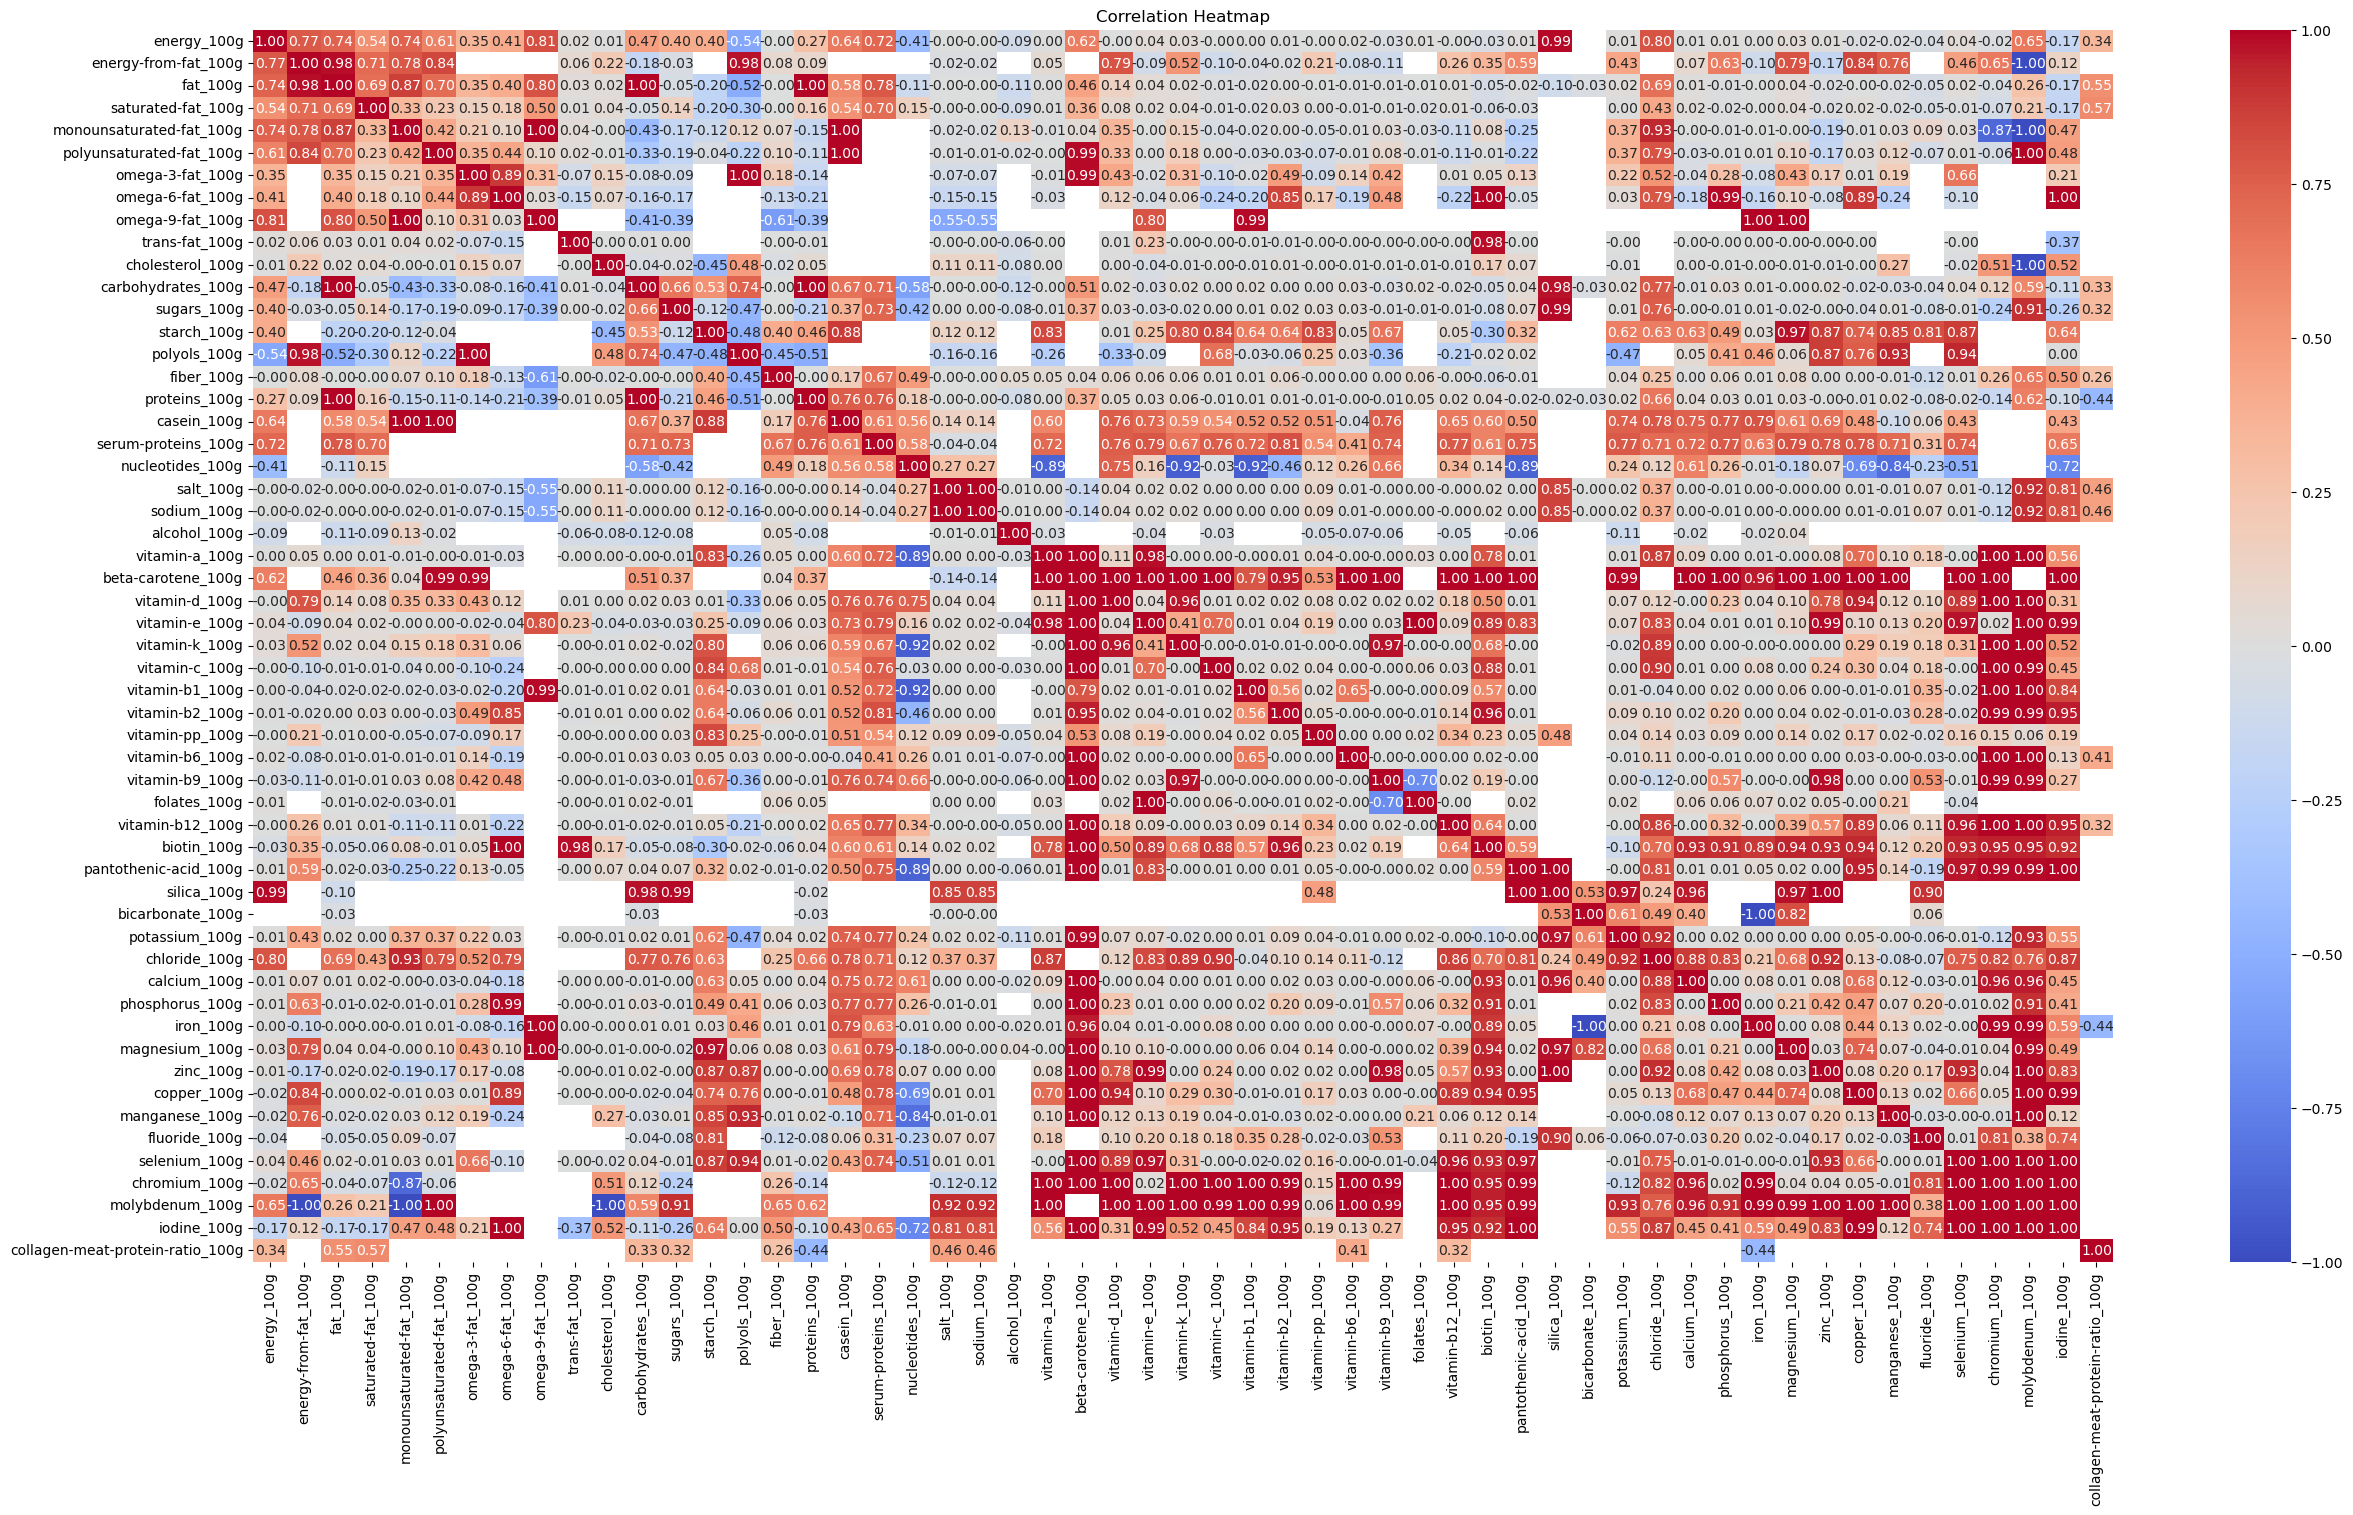

In [16]:
plt.figure(figsize=(30, 16))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

We see lots of corr = 1. Find them and drop following columns (why)

In [36]:
corr_matrix = df_corr.abs()  # -1 is bad too
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # matrix is symmetric

threshold = 0.999

# Find columns with a correlation of 1
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
to_drop

['carbohydrates_100g',
 'polyols_100g',
 'proteins_100g',
 'casein_100g',
 'sodium_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b6_100g',
 'folates_100g',
 'vitamin-b12_100g',
 'biotin_100g',
 'pantothenic-acid_100g',
 'silica_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g',
 'selenium_100g',
 'chromium_100g',
 'molybdenum_100g',
 'iodine_100g']

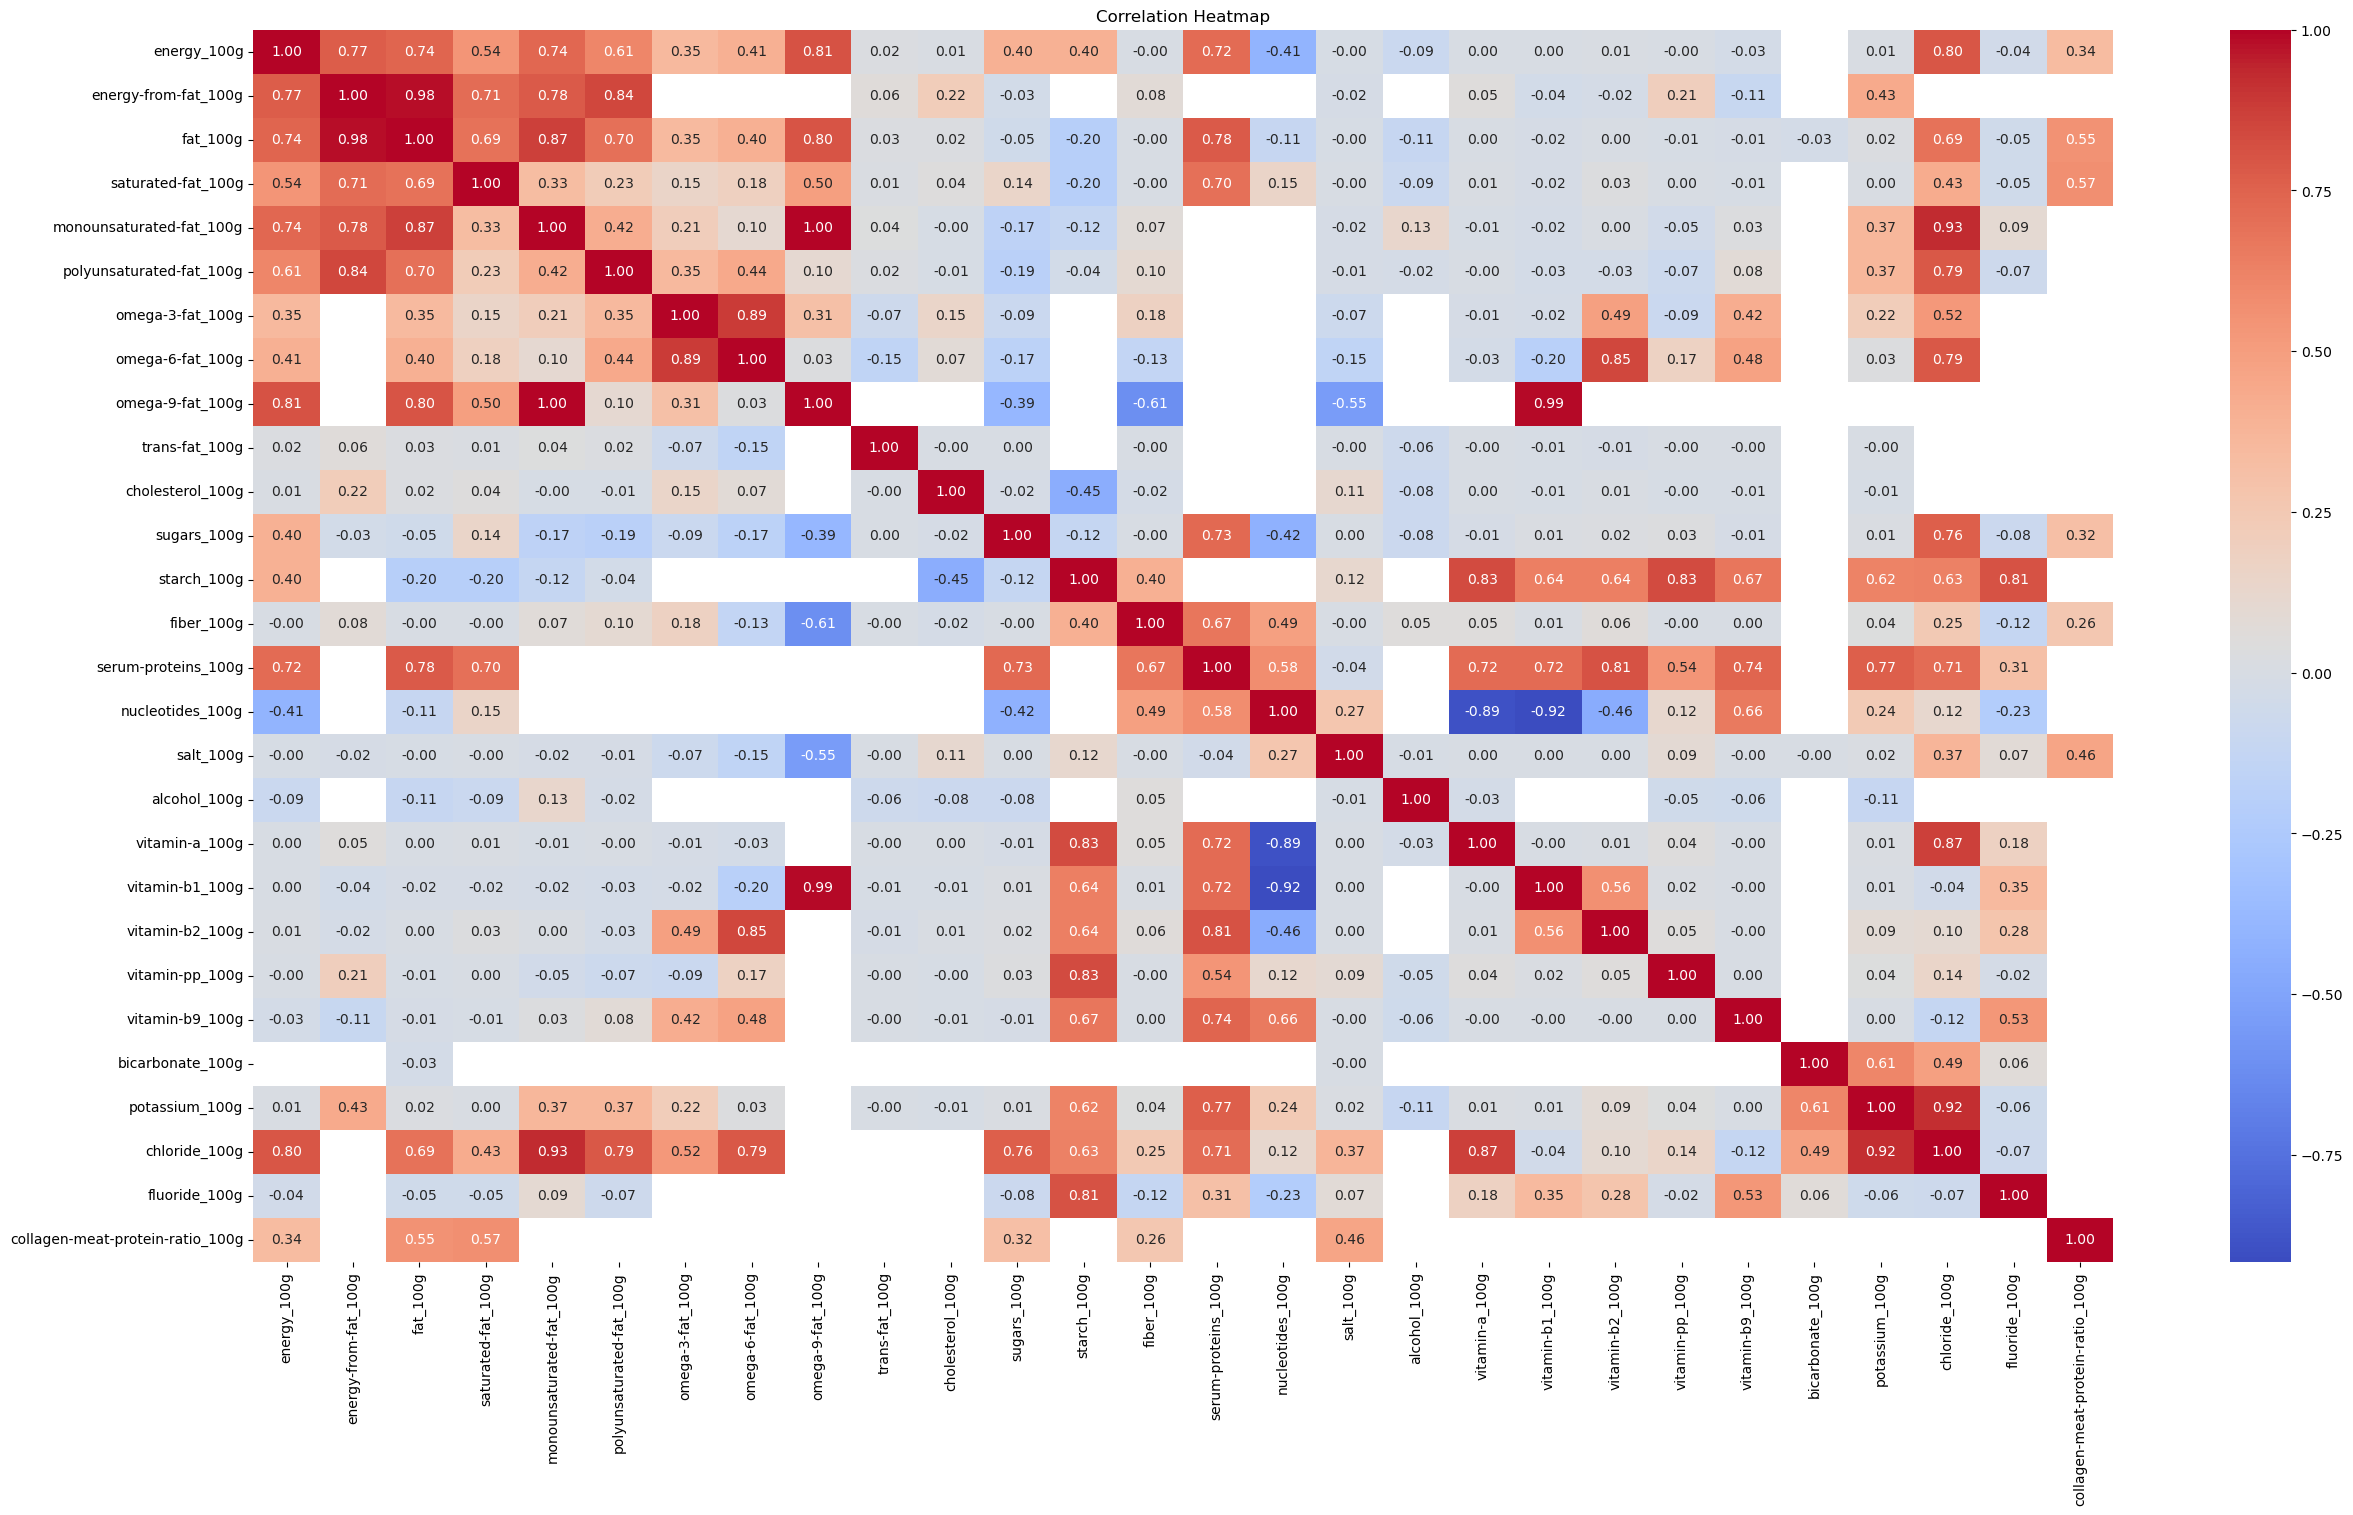

In [37]:
reduced_df = df.drop(columns=to_drop)
numeric_columns = reduced_df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(30, 16))
sns.heatmap(reduced_df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Text features

In [ ]:
data = df_dropped
text_columns = data.select_dtypes(include=["object"]).columns
numeric_columns = data.select_dtypes(include=["number"]).columns


s = SimpleImputer(
    missing_values=None, strategy="constant", fill_value=""
).fit_transform(data.loc[data[text_columns].isnull().any(axis=1).index][text_columns])
s

In [ ]:
s_pd = pd.DataFrame(s, columns=text_columns)
s_pd

In [ ]:
CountVectorizer().fit_transform(s_pd["product_name"])

In [ ]:
CountVectorizer().fit_transform(s_pd["quantity"])

In [ ]:
s_pd[s_pd.isnull().any(axis=1)]

## Numeric features

In [ ]:
data[numeric_columns]

In [ ]:
knn = KNNImputer(missing_values=np.nan, n_neighbors=3).fit_transform(
    data[numeric_columns]
)
knn

# Making pipeline

In [ ]:

def pipeline(data: pd.DataFrame, model, param_grid, verbose=100):
    text_columns = data.select_dtypes(include=["object"]).columns
    numeric_columns = data.select_dtypes(include=["number"]).columns

    # Define transformers for categorical and numerical features
    numerical_transformer = Pipeline(
        steps=[
            ("imputer", KNNImputer(missing_values=np.nan, n_neighbors=2)),  # Impute missing values
            ("scaler", StandardScaler()),  # Standardize features
        ]
    )
    def preprocess_text(data):
    # Ensure data is a string, handle missing values
        return data.astype(str)

    text_transformer = Pipeline(
        steps=[
            (
                "simputer",
                SimpleImputer(missing_values=None, strategy="constant", fill_value=""),
            ),
            ("function", FunctionTransformer(preprocess_text))
            ,
            ("vectorizer", CountVectorizer()),  # Encode text features
            ("scaler", StandardScaler()),
        ]
    )

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numerical_transformer, numeric_columns),
            ("text", text_transformer, text_columns),
        ]
    )

    pipe = Pipeline(
        steps=[("preprocessor", preprocessor), ("clustering", model)], verbose=True
    )
    max_score = -1.
    def silhouette_scorer(estimator, X):
        global max_score
        # Obtain the feature-transformed data
        X_transformed = estimator.named_steps['preprocessor'].transform(X)
        # Predict the cluster labels
        cluster_labels = estimator.named_steps['clustering'].fit_predict(X_transformed)
        # Calculate the silhouette score
        max_score = np.max(silhouette_score(X_transformed, cluster_labels), max_score)
        return max_score

    # Set up GridSearchCV
 
    grid_search = GridSearchCV(
        pipe, param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1, verbose=verbose
    )

    # Fit GridSearchCV
    grid_search.fit(data)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    return best_params, best_score


param_grid = {
    "preprocessor__num__imputer__n_neighbors": [
        1, 3,
    ],  # Tune n_neighbors for KNNImputer
    "clustering__n_clusters": [4],  # Tune number of clusters for KMeans
    "clustering__init": ["k-means++"],  # Different initializations
    "clustering__max_iter": [500, 1000],  # Max iterations for convergence
}
pipeline(df_dropped[numeric_columns], KMeans(random_state=42), param_grid)